**Markov Decision process**

In [7]:
from collections import defaultdict, namedtuple
from enum import Enum
from typing import Tuple, List
import random
from IPython.display import clear_output

Point = namedtuple('Point', ['x', 'y'])
class Direction(Enum):
  NORTH = "⬆"
  EAST = "⮕"
  SOUTH = "⬇"
  WEST = "⬅"

  @classmethod
  def values(self):
    return [v for v in self]

In [ ]:
class SimpleGridWorld(object):
  def __init__(self, width: int = 5, height: int = 5, debug: bool = False):
    self.width = width
    self.height = height
    self.debug = debug
    self.action_space = [d for d in Direction]
    self.reset()

In [ ]:
class SimpleGridWorld(SimpleGridWorld):
  def reset(self):
    self.cur_pos = Point(x=0, y=(self.height - 1))
    self.goal = Point(x=(self.width - 1), y=0)
    # If debug, print state
    if self.debug:
      print(self)
    return self.cur_pos, 0, False

In [ ]:
class SimpleGridWorld(SimpleGridWorld):
  def step(self, action: Direction):
    # Depending on the action, mutate the environment state
    if action == Direction.NORTH:
      self.cur_pos = Point(self.cur_pos.x, self.cur_pos.y + 1)
    elif action == Direction.EAST:
      self.cur_pos = Point(self.cur_pos.x + 1, self.cur_pos.y)
    elif action == Direction.SOUTH:
      self.cur_pos = Point(self.cur_pos.x, self.cur_pos.y - 1)
    elif action == Direction.WEST:
      self.cur_pos = Point(self.cur_pos.x - 1, self.cur_pos.y)
    # Check if out of bounds
    if self.cur_pos.x >= self.width:
      self.cur_pos = Point(self.width - 1, self.cur_pos.y)
    if self.cur_pos.y >= self.height:
      self.cur_pos = Point(self.cur_pos.x, self.height - 1)
    if self.cur_pos.x < 0:
      self.cur_pos = Point(0, self.cur_pos.y)
    if self.cur_pos.y < 0:
      self.cur_pos = Point(self.cur_pos.x, 0)

    # If at goal, terminate
    is_terminal = self.cur_pos == self.goal

    # Constant -1 reward to promote speed-to-goal
    reward = -1

    # If debug, print state
    if self.debug:
      print(self)

    return self.cur_pos, reward, is_terminal

In [ ]:
class SimpleGridWorld(SimpleGridWorld):
    def __repr__(self):
        res=" "
        for y in reversed(range(self.height)):
            for x in range(self.width):
                if self.goal.x == x and self.goal.y == y:
                    if self.cur_pos.x == x and self.cur_pos.y == y:
                        res +="@"
                    else:
                        res +="o"
                    continue
                if self.cur_pos.x == x and self.cur_pos.y == y:
                    res +="x"
                else:
                    res +="_"
            res +="\n"
        return res


In [ ]:
s = SimpleGridWorld(debug=True)
print("☝ This shows a simple visualisation of the environment state.\n")
s.step(Direction.SOUTH)
print(s.step(Direction.SOUTH), "⬅ This displays the state and reward from the environment 𝐀𝐅𝐓𝐄𝐑 moving.\n")
s.step(Direction.SOUTH)
s.step(Direction.SOUTH)
s.step(Direction.EAST)
s.step(Direction.EAST)
s.step(Direction.EAST)
s.step(Direction.EAST)


 x____
_____
_____
_____
____o

☝ This shows a simple visualisation of the environment state.

 _____
x____
_____
_____
____o

 _____
_____
x____
_____
____o

(Point(x=0, y=2), -1, False) ⬅ This displays the state and reward from the environment 𝐀𝐅𝐓𝐄𝐑 moving.

 _____
_____
_____
x____
____o

 _____
_____
_____
_____
x___o

 _____
_____
_____
_____
_x__o

 _____
_____
_____
_____
__x_o

 _____
_____
_____
_____
___xo

 _____
_____
_____
_____
____@



(Point(x=4, y=0), -1, True)

**Markov Decision Process Iteration**
https://github.com/SparkShen02/MDP-with-Value-Iteration-and-Policy-Iteration

In [ ]:
REWARD = -0.01
DISCOUNT =0.99
MAX_ERROR = 10**(-3)

NUM_ACTIONS =4
ACTIONS =[(1,0),(0,-1),(-1,0),(0,1)]
NUM_ROW =3
NUM_COL=4
U=[[0,0,0,1],[0,0,0,-1],[0,0,0,0],[0,0,0,0]]

def printEnvironment(arr, policy=False):
    res = " "
    for r in range (NUM_ROW):
        res += "|"
        for c in range (NUM_COL):
            if r == c == 1:
                val = "WALL"
            elif r <=1 and c == 3:
                val = "+1" if r == 0 else "-1"
            else:
                if policy :
                    val = ["Down","Left","Up","Right"][arr[r][c]]
                else:
                    val = str(arr[r][c])
            res += " " + val[:5].ljust(5) + "|"
        res += "\n"
    print(res)

def getU(U,r,c,action):
    dr,dc= ACTIONS[action]
    newR,newC=r+dr,c+dc
    if newR<0 or newC <0 or newR >=NUM_ROW or newC >= NUM_COL or (newR == newC == 1):
        return U[r][c]
    else:
        return U[newR][newC]
def calculateU(U,r,c,action):
    u=REWARD
    u+= 0.1*DISCOUNT * getU(U,r,c,(action-1)%4)
    u+= 0.8*DISCOUNT * getU(U,r,c,action)
    u+= 0.1*DISCOUNT * getU(U,r,c,(action+1)%4)
    return u
def valueIteration(U):
    print("During the value iterating:\n")
    while True:
        nextU =[[0,0,0,1],[0,0,0,-1],[0,0,0,0],[0,0,0,0]]
        error=0
        for r in range (NUM_ROW):
            for c in range (NUM_COL):
                if (r <=1 and c==3) or (r==c==1):
                    continue
                nextU[r][c]=max([calculateU(U,r,c,action) for action in range(NUM_ACTIONS)])
                error=max(error,abs(nextU[r][c]-U[r][c]))
        U=nextU
        printEnvironment(U)
        if error < MAX_ERROR * (1-DISCOUNT)/DISCOUNT:
            break
    return U
def getOptimalPolicy(U):
    policy=[[-1,-1,-1,-1] for i in range(NUM_ROW)]
    for r in range(NUM_ROW):
        for c in range(NUM_COL):
            if (r <=1 and c==3) or (r==c==1):
                continue
            maxAction, maxU= None, -float("inf")
            for action in range (NUM_ACTIONS):
                u=calculateU(U,r,c,action)
                if u > maxU:
                    maxAction, maxU =action,u
            policy[r][c] =maxAction
    return policy

print("The initial U is:\n")
printEnvironment(U)

U=valueIteration(U)

policy=getOptimalPolicy(U)
print("The Optimal policy is :\n")
printEnvironment(policy,True)

The initial U is:

 | 0    | 0    | 0    | +1   |
| 0    | WALL | 0    | -1   |
| 0    | 0    | 0    | 0    |

During the value iterating:

 | -0.01| -0.01| 0.782| +1   |
| -0.01| WALL | -0.01| -1   |
| -0.01| -0.01| -0.01| -0.01|

 | -0.01| 0.607| 0.858| +1   |
| -0.01| WALL | 0.509| -1   |
| -0.01| -0.01| -0.01| -0.01|

 | 0.467| 0.790| 0.917| +1   |
| -0.02| WALL | 0.621| -1   |
| -0.02| -0.02| 0.389| -0.02|

 | 0.659| 0.873| 0.934| +1   |
| 0.354| WALL | 0.679| -1   |
| -0.03| 0.292| 0.476| 0.196|

 | 0.781| 0.902| 0.941| +1   |
| 0.582| WALL | 0.698| -1   |
| 0.295| 0.425| 0.576| 0.287|

 | 0.840| 0.914| 0.944| +1   |
| 0.724| WALL | 0.705| -1   |
| 0.522| 0.530| 0.613| 0.375|

 | 0.869| 0.919| 0.945| +1   |
| 0.798| WALL | 0.708| -1   |
| 0.667| 0.580| 0.638| 0.414|

 | 0.883| 0.920| 0.945| +1   |
| 0.836| WALL | 0.709| -1   |
| 0.746| 0.634| 0.649| 0.437|

 | 0.889| 0.921| 0.945| +1   |
| 0.854| WALL | 0.710| -1   |
| 0.789| 0.706| 0.658| 0.449|

 | 0.892| 0.921| 0.945| +1   |
|

**Temporal Difference**

In [ ]:
import random
class RandomWalkEnvironment:
    def __init__(self,num_states):
        self.num_states=num_states
        self.current_state=num_states //2
        self.actions =[-1,1]
    def reset(self):
        self.current_state=self.num_states//2
    def step(self,action):
        reward=0
        done = False
        new_state = self.current_state + action
        if new_state == 0:
            reward=-1
            done = True
        elif new_state == self.num_states-1:
            reward=2
            done = True
        self.current_state=new_state
        return new_state,reward,done
    def render(self):
        env_str = "|" + " "*self.num_states + "|"
        env_str = env_str[:self.current_state +1] + "X" + env_str[self.current_state + 2:]
        print(env_str)
class TDLearner:
    def __init__(self,num_states,alpha,gamma):
        self.num_states = num_states
        self.alpha=alpha
        self.gamma=gamma
        self.values=[0]*num_states

    def update(self,state,reward,next_state):
        td_target=reward + self.gamma*self.values[next_state]
        td_error =td_target - self.values[state]
        self.values[state] += self.alpha*td_error
    def get_action(self,state):
        if random.random()<0.5:
            return random.choice([-1,1])
        else:
            if state == 0:
                return 1
            elif state == self.num_states -1:
                return -1
            else:
                return -1 if self.values[state-1] > self.values[state+1] else 1
def main():
    num_states=7
    env = RandomWalkEnvironment(num_states)
    td_learner =TDLearner(num_states,alpha =0.1,gamma=1.0)

    num_episodes =10
    for episode in range(num_episodes):
        state=env.current_state
        env.reset()
        done = False

        print(f"Episode {episode +1}")
        env.render()

        while not done:
            action = td_learner.get_action(state)
            next_state,reward,done =env.step(action)
            td_learner.update(state,reward,next_state)
            state= next_state
            env.render()
        print(td_learner.values)
if __name__ == "__main__":
    main()



Episode 1
|   X   |
|    X  |
|     X |
|      X|
[0, 0, 0, 0.0, 0.0, 0.2, 0]
Episode 2
|   X   |
|  X    |
| X     |
|  X    |
|   X   |
|    X  |
|   X   |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|   X   |
|    X  |
|     X |
|    X  |
|     X |
|      X|
[0, 0.0, 0.0, 0.005395573800000002, 0.07062376084400002, 0.323980665356, 0.0]
Episode 3
|   X   |
|  X    |
|   X   |
|  X    |
|   X   |
|    X  |
|   X   |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|      X|
[0, 0.0, 0.0009765988578000003, 0.016804167910166007, 0.15358788139912458, 0.42863135183290957, 0.0]
Episode 4
|   X   |
|  X    |
|   X   |
|    X  |
|     X |
|      X|
[0, 0.0, 0.002559355763036601, 0.030482539259061865, 0.18109222844250308, 0.5857779826381966, 9.765988578000003e-05]
Episode 5
|   X   |
|  X    |
|   X   |
|    X  |
|   X   |
|    X  |
|     X |
|      X|
[0, 0.0, 0.005351674112639128, 0.0577428930012

**Temporal Difference Learning TD(0) and TD (Lambda)**

lambda 0.0 alpha 0.0 rmse 0.5209880722517277
lambda 0.0 alpha 0.16 rmse 0.3091027440995142
lambda 0.0 alpha 0.32 rmse 0.2779995008508639
lambda 0.0 alpha 0.48 rmse 0.26879962539207275
lambda 0.0 alpha 0.64 rmse 0.31343122882646307
lambda 0.0 alpha 0.8 rmse 0.297318283841099
lambda 0.25 alpha 0.0 rmse 0.5209880722517277
lambda 0.25 alpha 0.16 rmse 0.25865823431109725
lambda 0.25 alpha 0.32 rmse 0.2403270706385517
lambda 0.25 alpha 0.48 rmse 0.22066936709729865
lambda 0.25 alpha 0.64 rmse 0.31641199768845163
lambda 0.25 alpha 0.8 rmse 0.21012149790744175
lambda 0.5 alpha 0.0 rmse 0.5209880722517277
lambda 0.5 alpha 0.16 rmse 0.2819863102331214
lambda 0.5 alpha 0.32 rmse 0.232218287519253
lambda 0.5 alpha 0.48 rmse 0.1836337056556838
lambda 0.5 alpha 0.64 rmse 0.22321536247279233
lambda 0.5 alpha 0.8 rmse 0.1707559612894217
lambda 0.75 alpha 0.0 rmse 0.5209880722517277
lambda 0.75 alpha 0.16 rmse 0.22785319221615158
lambda 0.75 alpha 0.32 rmse 0.2121233877784703
lambda 0.75 alpha 0.48 rms

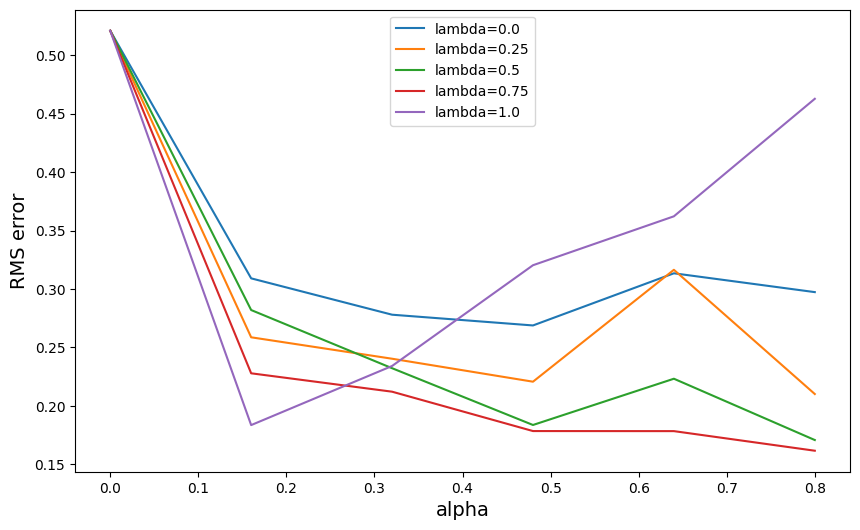

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NUM_STATES =21
START = 9
END_0 = 0
END_1 =20

class ValueFunctionTD:
    def __init__(self,alpha = 0.1,gamma =0.9 , lmbda=0.8):
        self.weights =np.zeros(NUM_STATES)
        self.z=np.zeros(NUM_STATES)
        self.alpha=alpha
        self.gamma=gamma
        self.lmbda=lmbda
    def value(self,state):
        v=self.weights[state]
        return v
    def updateZ(self,state):
        dev=1
        self.z*=self.gamma *self.lmbda
        self.z[state] += dev
    def learn(self,state,nxtState,reward):
        delta= reward+self.gamma *self.value(nxtState) -self.value(state)
        delta*=self.alpha
        self.weights+=delta *self.z

class RWTD:
    def __init__(self,start = START,end=False,debug=False):
        self.actions=["left","right"]
        self.state=start
        self.end=end
        self.reward=0
        self.debug=debug
    def chooseAction(self):
        action = np.random.choice(self.actions)
        return action
    def takeAction(self,action):
        new_state=self.state
        if not self.end:
            if action == "left":
                new_state = self.state-1
            else:
                new_state=self.state+1
            if new_state in [END_0,END_1]:
                self.end=True
        return new_state
    def giveReward(self,state):
        if state == END_0:
            return -1
        if state == END_1:
            return 1
        return 0

    def reset(self):
        self.state=START
        self.end=False
        self.states=[]

    def play(self,valueFunc, rounds = 100):
        for _ in range(rounds):
            self.reset()
            action = self.chooseAction()
            while not self.end:
                nxtState=self.takeAction(action)
                self.reward = self.giveReward(nxtState)
                valueFunc.updateZ(self.state)
                valueFunc.learn(self.state, nxtState, self.reward)
                self.state = nxtState
                action = self.chooseAction()
                if self.debug:
                    print("end at {} reward {}".format(self.state, self.reward))

actual_state_values = np.arange(-20, 22, 2) / 20.0


actual_state_values[0] = actual_state_values[-1] = 0

alphas = np.linspace(0, 0.8, 6)
lambdas = np.linspace(0, 1, 5)
rounds = 50

plt.figure(figsize=[10, 6])
for lamb in lambdas:
    alpha_errors = []
    for alpha in alphas:
        valueFunc = ValueFunctionTD(alpha=alpha, lmbda=lamb)
        rw = RWTD(debug=False)
        rw.play(valueFunc, rounds=rounds)
        rmse = np.sqrt(np.mean(np.power(valueFunc.weights - actual_state_values, 2)))
        print("lambda {} alpha {} rmse {}".format(lamb, alpha, rmse))
        alpha_errors.append(rmse)
    plt.plot(alphas, alpha_errors, label="lambda={}".format(lamb))
plt.xlabel("alpha", size=14)
plt.ylabel("RMS error", size=14)
plt.legend()
plt.show()






**Implementation of cartpole environment deep Neural Network**

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


1/1 [==============================] - 0s 24ms/step
Episode 0, Average Reward: 16.0
1/1 [==============================] - 0s 23ms/step


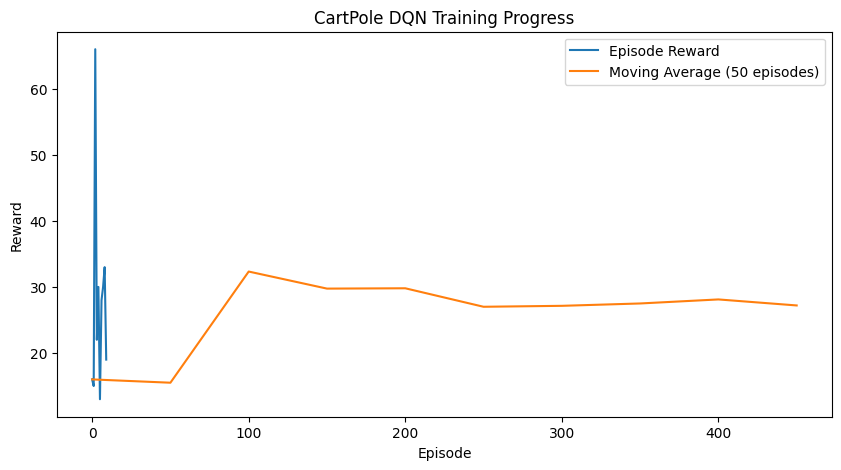

1/1 [==============================] - 0s 23ms/step
Average Reward (Evaluation): 18.3


In [ ]:
import numpy as np
import tensorflow as tf
import gym
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Define the Q-network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear')  # 2 output nodes for left and right actions
])

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError()

# Training parameters
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 32
target_update_frequency = 100

# Initialize the target Q-network with the same weights as the main Q-network
target_model = tf.keras.models.clone_model(model)
target_model.set_weights(model.get_weights())

# Function to select an action based on epsilon-greedy policy
def select_action(state):
    if np.random.rand() <= epsilon:
        return env.action_space.sample()  # Explore by taking a random action
    else:
        q_values = model.predict(state.reshape(1, -1))
        return np.argmax(q_values)

# Function to update the target Q-network
def update_target_model():
    target_model.set_weights(model.get_weights())

# Training loop
episodes = 10
rewards = []

# Lists to store episode rewards and their moving average
episode_rewards = []
moving_avg_rewards = []

# Visualization: Initialize a figure for plotting rewards
plt.figure(figsize=(10, 5))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('CartPole DQN Training Progress')

for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = select_action(state)
        next_state, reward, done, _ = env.step(action)

        target = model.predict(state.reshape(1, -1))
        if done:
            target[0][action] = reward
        else:
            target[0][action] = reward + gamma * np.max(target_model.predict(next_state.reshape(1, -1)))

        with tf.GradientTape() as tape:
            q_values = model(state.reshape(1, -1))
            loss = loss_fn(target, q_values)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        state = next_state
        total_reward += reward

        if done:
            rewards.append(total_reward)
            episode_rewards.append(total_reward)

            if epsilon > epsilon_min:
                epsilon *= epsilon_decay
            if episode % target_update_frequency == 0:
                update_target_model()

            if episode % 10 == 0:
                print(f"Episode {episode}, Average Reward: {np.mean(rewards[-10:])}")

            # Visualization: Plot the rewards over episodes every 50 episodes
            if episode % 50 == 0 and episode > 0:
                moving_avg = np.mean(episode_rewards[-50:])
                moving_avg_rewards.append(moving_avg)
                plt.plot(rewards, label='Episode Reward')
                plt.plot(np.arange(len(moving_avg_rewards)) * 50, moving_avg_rewards, label='Moving Average (50 episodes)')
                plt.legend()
                plt.pause(0.1)

            break

# Final visualization: Plot the rewards and moving average
moving_avg_rewards = [np.mean(episode_rewards[i-50:i+1]) if i >= 50 else np.mean(episode_rewards[:i+1]) for i in range(len(episode_rewards))]
plt.plot(rewards, label='Episode Reward')
plt.plot(np.arange(len(moving_avg_rewards)) * 50, moving_avg_rewards, label='Moving Average (50 episodes)')
plt.legend()
plt.show()
# Evaluate the trained model
total_rewards = []
for _ in range(10):
    state = env.reset()
    episode_reward = 0
    while True:
        action = np.argmax(model.predict(state.reshape(1, -1)))
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state
        if done:
            total_rewards.append(episode_reward)
            break
print("Average Reward (Evaluation):", np.mean(total_rewards))